In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from matplotlib.patches import ConnectionPatch
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/jaylensheard/Documents/HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
def missing_cols(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} : {df[col].isnull().sum()}")
    if total == 0:
        print("no null values")
            
missing_cols(df)

no null values


In [7]:
# Replace column values with resepective attributes
df['Education'] = df['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement'] = df['JobInvolvement'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction'] = df['JobSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['PerformanceRating'] = df['PerformanceRating'].replace({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})

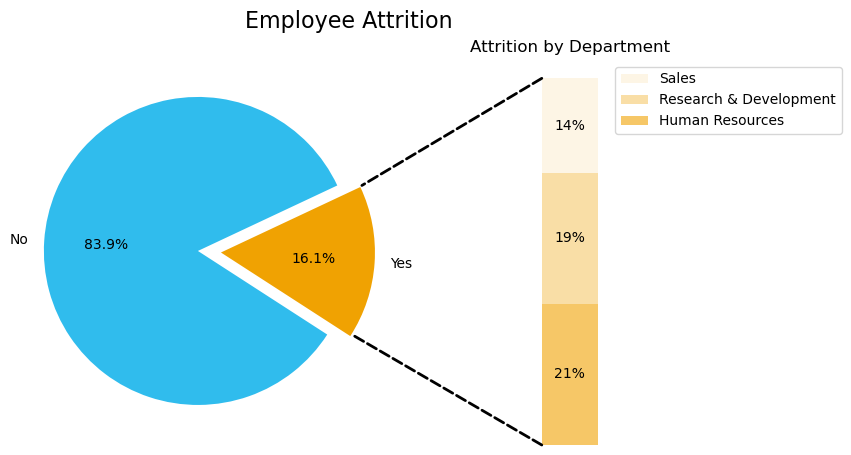

In [9]:
# Attrition by Department 
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(9,5), gridspec_kw={'width_ratios':[3, 2]})
fig.subplots_adjust(wspace=0)
fig.suptitle('Employee Attrition', fontsize=16)

# Pie chart attributes
overall_ratios=df['Attrition'].value_counts(normalize=True)
labels=['No','Yes']
explode=[0.15,0]
colors=['#30bced','#f0a202']
angle = 30 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=colors)

# Bar chart attributes
department_ratios=df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().loc[:,'Yes'].sort_values(ascending=False)
department_labels=['Human Resources','Research & Development','Sales']
bottom= 1.0
width= .20
bar_colors=['#f0a202']

# Legend bar chart attributes
for j, (height, label) in enumerate(reversed([*zip(department_ratios, department_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=bar_colors, label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
ax2.set_title('Attrition by Department')
ax2.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# ConnectionPatch
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height  = sum(department_ratios)

# Bottom Connecting Line
x = r * np.cos(np.pi / 180 * theta2) + center[1]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bottom), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('black')
con.set_linewidth(2)
con.set_linestyle('--')
ax2.add_artist(con)

# Top Connecting Line
x = r * np.cos(np.pi / 180 * theta1) + center[1]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bottom + bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color('black')
con.set_linewidth(2)
con.set_linestyle('--')
ax2.add_artist(con)

plt.show()

In [10]:
fig = make_subplots(rows=2, cols=1, specs=[[{"type": "bar"}], [{"type": "bar"}]], subplot_titles=('Gender = Male', 'Gender = Female'))
title = 'Attrition by Department and Gender'

# Bar Chart (Attrition, Gender = 'Male')
plot_df_male = df[df['Gender'] == 'Male'].groupby(['Department', 'Attrition']).size().unstack().reset_index()
x_male = plot_df_male['Department']
y_male_yes = plot_df_male['Yes'] 
y_male_no = plot_df_male['No'] 

fig.add_trace(go.Bar(x=x_male, y=y_male_yes, name='Yes'), row=1, col=1)
fig.add_trace(go.Bar(x=x_male, y=y_male_no, name='No'), row=1, col=1)

# Bar Chart (Attrition, Gender = 'Female')
plot_df_female = df[df['Gender'] == 'Female'].groupby(['Department', 'Attrition']).size().unstack().reset_index()
x_female = plot_df_female['Department']
y_female_yes = plot_df_female['Yes'] 
y_female_no = plot_df_female['No']

fig.add_trace(go.Bar(x=x_female, y=y_female_yes, name='Yes'), row=2, col=1)
fig.add_trace(go.Bar(x=x_female, y=y_female_no, name='No'), row=2, col=1)

fig.update_layout(title=title)
fig.show()